<a href="https://colab.research.google.com/github/Rashigarashi/fundamental-of-machine-learning/blob/main/Exp_SVM_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded. Shape: (2111, 17)
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight 

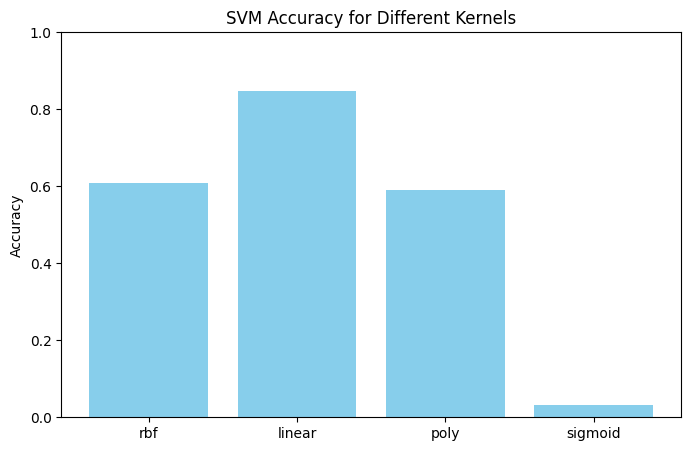

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

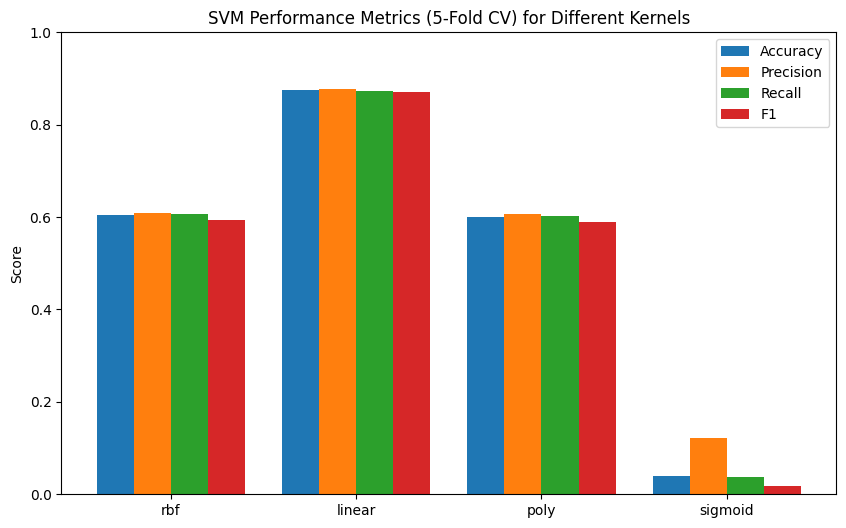


First 5 Support Vectors (RBF kernel):
[[ 0.       21.798856  1.672007 49.980968  1.        1.        2.979383
   3.        1.        0.        2.975887  0.        0.945093  1.241755
   3.        3.      ]
 [ 0.       19.272573  1.71367  50.        0.        1.        1.005578
   4.        1.        0.        1.        0.        1.683957  0.704978
   2.        3.      ]
 [ 1.       19.        1.7      50.        0.        1.        1.
   4.        1.        0.        1.        0.        2.        1.
   2.        3.      ]
 [ 0.       19.665881  1.676346 49.105025  0.        0.        2.720701
   3.        2.        0.        2.        0.        1.862235  1.
   2.        3.      ]
 [ 1.       17.038222  1.710564 51.588874  0.        1.        2.
   2.057935  2.        0.        2.371015  0.        0.288032  0.714627
   2.        3.      ]]


In [2]:



import zipfile
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

zip_path = 'obesity dataset.zip'
extract_path = './obesity_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

csv_file = os.path.join(extract_path, 'ObesityDataSet_raw_and_data_sinthetic.csv')

df = pd.read_csv(csv_file)
print("Dataset loaded. Shape:", df.shape)
print(df.head())

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

kernels = {
    'rbf': {'C': 1.0, 'gamma': 'scale'},
    'linear': {'C': 1.0},
    'poly': {'degree': 3, 'C': 1.0, 'gamma': 'scale'},
    'sigmoid': {'C': 1.0, 'gamma': 'scale'}
}

def train_evaluate_svm(kernel, params, X_train, X_test, y_train, y_test):
    print(f"\nTraining SVM with kernel = '{kernel}'")
    model = SVC(kernel=kernel, **params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average=None, zero_division=0)
    recall = recall_score(y_test, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_test, y_pred, average=None, zero_division=0)

    print(f"Accuracy: {acc:.4f}")
    for i, label in enumerate(le_target.classes_):
        print(f"Class '{label}': Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-score={f1[i]:.4f}")

    return model, acc, precision.mean(), recall.mean(), f1.mean()

results = {}

for kernel, params in kernels.items():
    model, acc, prec, rec, f1 = train_evaluate_svm(kernel, params, X_train, X_test, y_train, y_test)
    results[kernel] = {'model': model, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

plt.figure(figsize=(8,5))
plt.bar(results.keys(), [v['accuracy'] for v in results.values()], color='skyblue')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy for Different Kernels')
plt.ylim(0,1)
plt.show()

cv_results = {'kernel': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for kernel, params in kernels.items():
    svm = SVC(kernel=kernel, **params, random_state=42)
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    scores = cross_validate(svm, X_encoded, y_encoded, cv=skf, scoring=scoring)

    cv_results['kernel'].append(kernel)
    cv_results['accuracy'].append(np.mean(scores['test_accuracy']))
    cv_results['precision'].append(np.mean(scores['test_precision_macro']))
    cv_results['recall'].append(np.mean(scores['test_recall_macro']))
    cv_results['f1'].append(np.mean(scores['test_f1_macro']))

plt.figure(figsize=(10,6))
bar_width = 0.2
x = np.arange(len(kernels))

metrics = ['accuracy', 'precision', 'recall', 'f1']
for i, metric in enumerate(metrics):
    plt.bar(x + i*bar_width, cv_results[metric], width=bar_width, label=metric.capitalize())

plt.xticks(x + bar_width*1.5, cv_results['kernel'])
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('SVM Performance Metrics (5-Fold CV) for Different Kernels')
plt.legend()
plt.show()

rbf_model = results['rbf']['model']
print("\nFirst 5 Support Vectors (RBF kernel):")
print(rbf_model.support_vectors_[:5])
